In [1]:
# Import necessary packages
import math, argparse
import matplotlib.pyplot as plt
import numpy as np
from numpy import random
# Set seed to ensure reproducibility
random.seed(1)

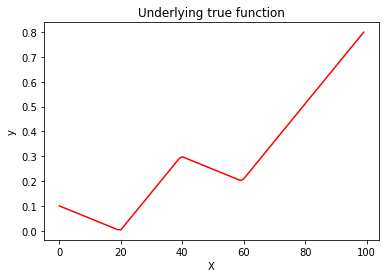

In [2]:
# The true target y which is unkonwn in practice and to be approximated by the model
def get_true_y(x):
    return np.abs(np.abs(x - 0.4) - 0.2) + x/2 - 0.1
# Create a list of equally spaced X values
X_vals = np.linspace(0, 1, 100).reshape(-1,1)
# Calculate the corresponding true y values
y_vals = get_true_y(X_vals)
# Plot the true function
plt.plot(y_vals, color = 'r')
plt.title('Underlying true function')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [3]:
# Function to generate the new design matrix 
def polynomial(x, num_basis=2):
    # Create the matrix of zeros as placeholder
    Phi = np.zeros((x.shape[0], num_basis))
    # Fill in each column based on the sequence of polynomials
    for i in range(num_basis):
        Phi[:, i:i+1] = x**i
    return Phi

# Function to estimate the model coefficients
def estimate_coef(X, y, num_basis):
    # Expand the original design matrix by adding polynomials
    Phi = polynomial(X, num_basis=num_basis)
    # Approximate the penalty term using the omega matrix
    q = np.arange(2, num_basis).reshape(1, -1)
    r = q.reshape(-1,  1)
    omega = np.zeros((num_basis, num_basis))
    omega[2:, 2:] = (q-1) * q * (r-1) * r / (q+r-3)
    # Generate the square root of omega matrix into beta matrix after clipping non negative values
    values, vectors = np.linalg.eig(omega)
    beta = vectors @ np.diag(values.clip(min = 0) ** 0.5) 
    # Create the elongated design matrix and outcome variable respectively
    y_star = np.concatenate((y, np.zeros(omega.shape[0]).reshape(-1,1)), axis=0)
    Phi_star = np.concatenate((Phi, math.sqrt(lamb) * beta.T), axis=0)
    # Solve for the optimal weight vector using the least squares procedure from numpy
    w_star = np.linalg.lstsq(Phi_star, y_star, rcond=None)[0]
    return w_star

# Function to calculate the mean squared error
def calculate_mse(X, y, coef, num_basis):
    # Expand the original design matrix by adding polynomials
    Phi = polynomial(X, num_basis=num_basis)
    # Generate model prediction
    f_star = Phi@coef
    # Calculate the residuals
    resid = y - f_star
    # Cost with the optimal weight 
    Q = np.dot(resid.T, resid).mean()
    return Q

# Function to perform multiple simulation and report the median result
def compute_performance(num_train_samples, num_runs, num_basis_max, train_noise_std=0):
    # Placeholder matrix to store mse of multiple runs
    mse_train = np.zeros((num_runs, num_basis_max))
    mse_test = np.zeros((num_runs, num_basis_max))
    # Perform multiple runs and report the median
    for k in range(num_runs):
        # Generate a different training set for each run
        X_train = random.rand(num_train_samples).reshape(-1,1)
        y_train = get_true_y(X_train).reshape(-1,1)
        # Corrupt the target by random noise if enabled
        if train_noise_std > 0:
            y_train = y_train + np.random.normal(0, 0.01, y_train.shape[0]).reshape(-1,1)
        # Generate a list of test set data points used to derive the generalization performance
        # No noise is added to the test set
        X_test = np.linspace(0, 1, 100, dtype = X_train.dtype).reshape(-1,1)
        y_test = get_true_y(X_test).reshape(-1,1)
        # Vary the model complexity by looping over each polynomial degree 
        for num_basis in range(1, num_basis_max + 1):
            # Estimate the model effificients
            fitted_coef = estimate_coef(X_train, y_train, num_basis)
            # Store the results of multiple runs
            mse_train[k, num_basis-1] = calculate_mse(X_train, y_train, fitted_coef, num_basis)
            mse_test[k, num_basis-1] = calculate_mse(X_test, y_test, fitted_coef, num_basis)
    return np.median(mse_train, axis = 0), np.median(mse_test, axis=0)

## Double descent

In [4]:
# Set global hyper parameters
lamb = 1e-12
num_runs = 10
num_train_samples = 10
num_basis_max = 30

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:63: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:64: ComplexWarning: Casting complex values to real discards the imaginary part


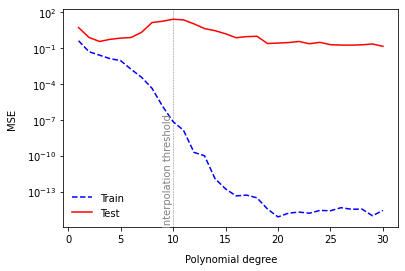

In [5]:
# Plot the MSE vs. degree curves
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_yscale('log')
ax.set_xlabel('Polynomial degree', labelpad = 10)
ax.set_ylabel('MSE', labelpad = 10)
ax.axvline(x = num_train_samples,
           color = 'gray', linewidth = 0.5, linestyle = '--')
ax.text(num_train_samples - 0.2, 1e-16, 'Interpolation threshold',
        fontsize = 10, color = 'gray',
        rotation = 90, rotation_mode='anchor')
mse_train, mse_test = compute_performance(num_train_samples=num_train_samples, 
                                          num_runs=num_runs, num_basis_max=num_basis_max,
                                          train_noise_std=0)
ax.plot(np.arange(1, num_basis_max + 1), mse_train, color = 'blue', label = 'Train',
        linestyle = '--')
ax.plot(np.arange(1, num_basis_max + 1), mse_test, color = 'red', label = 'Test')
ax.legend(frameon = False)
plt.show()

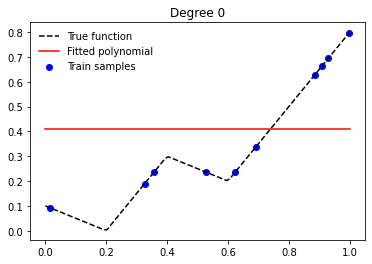

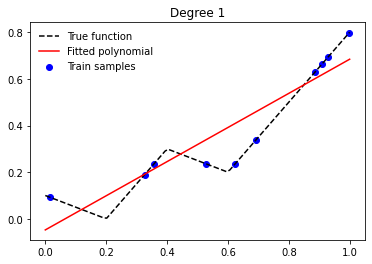

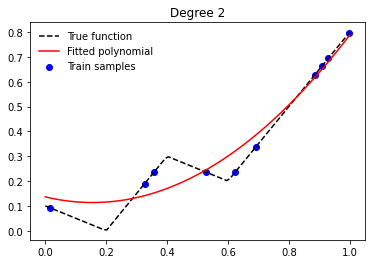

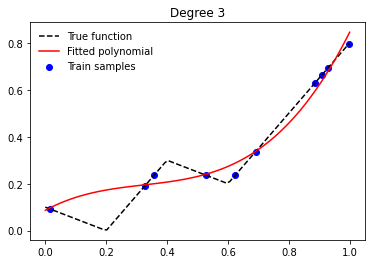

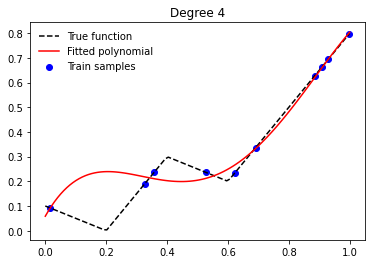

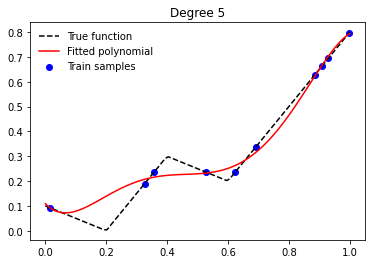

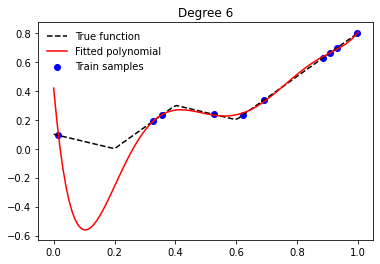

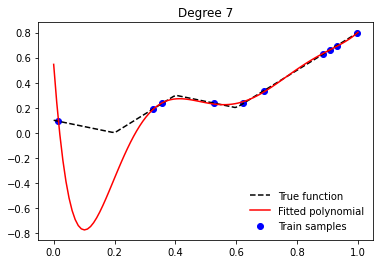

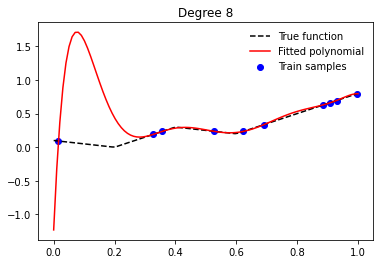

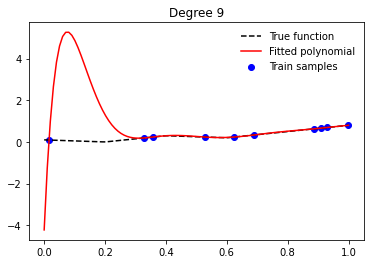

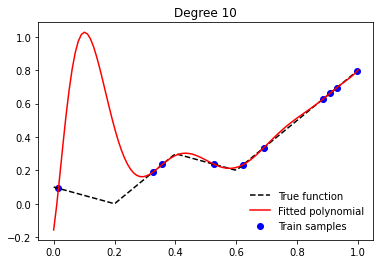

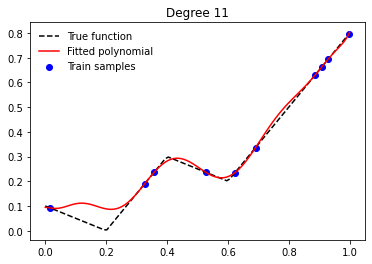

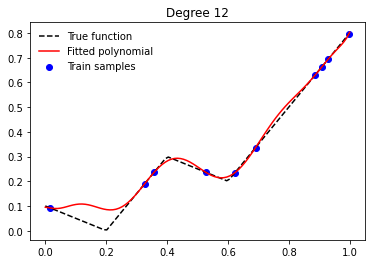

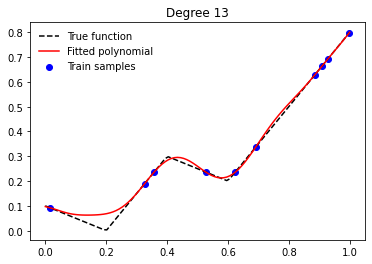

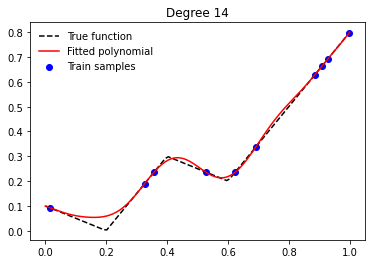

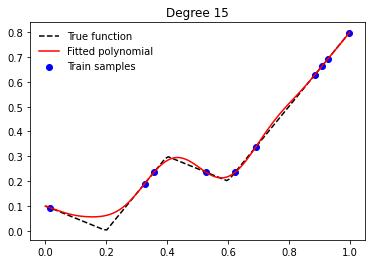

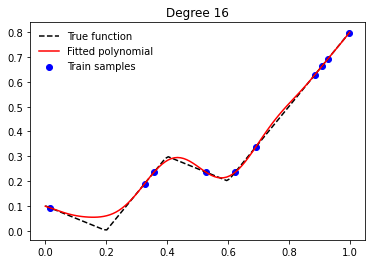

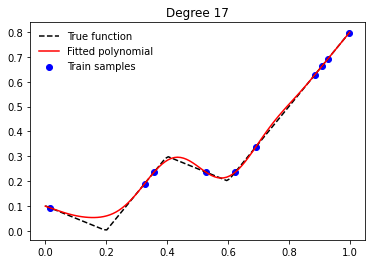

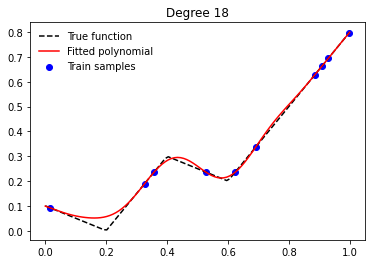

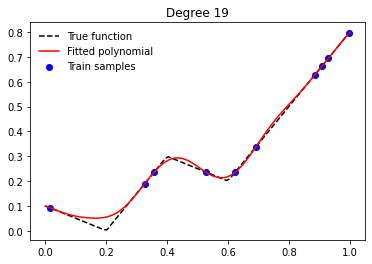

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


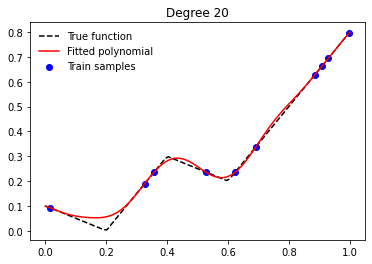

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


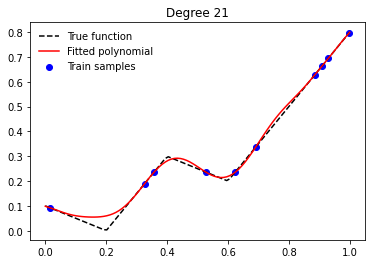

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


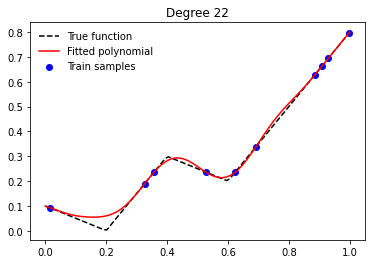

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


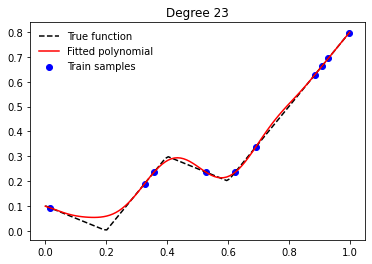

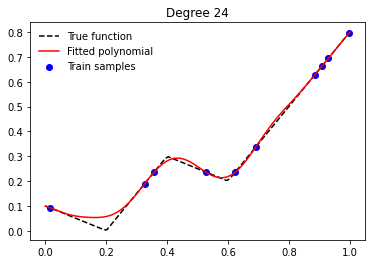

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


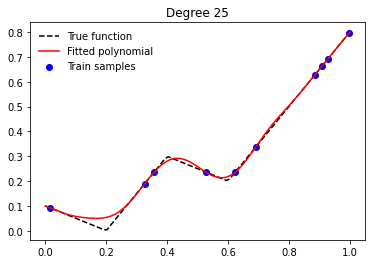

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


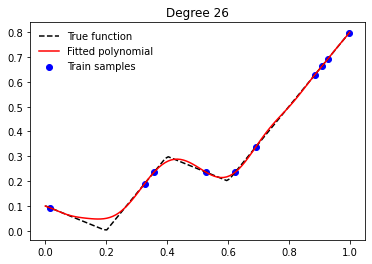

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


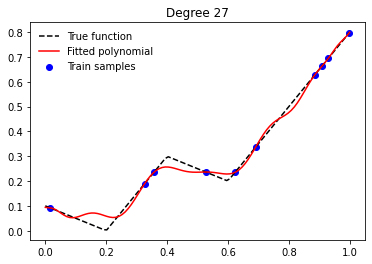

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


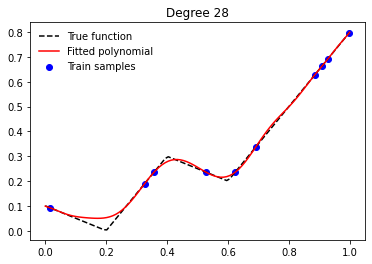

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


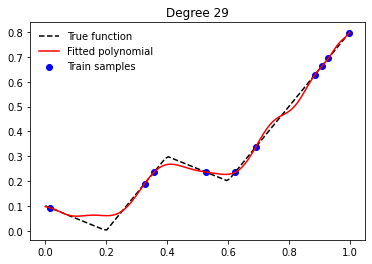

In [6]:
# Generate the training set
X_train = random.rand(num_train_samples).reshape(-1,1)
y_train = get_true_y(X_train).reshape(-1,1)
# Generate a list of data points along the true function
X_test = np.linspace(0, 1, 100, dtype = X_train.dtype).reshape(-1,1)
y_test = get_true_y(X_test).reshape(-1,1)
# Plot the fitted model and the true function by varying the polynomial degree
for num_basis in range(1, num_basis_max + 1):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.set_title(f'Degree {num_basis-1}')
    ax.plot(X_test, y_test, color = 'black', label = 'True function', linestyle = '--')
    ax.scatter(X_train, y_train, color = 'blue', label = 'Train samples')
    # Estimate the model coefficients
    fitted_coef = estimate_coef(X_train, y_train, num_basis)
    # Expand the original design matrix by adding polynomials
    Phi = polynomial(X_test, num_basis=num_basis)
    # Generate model prediction
    f_star = Phi@fitted_coef
    ax.plot(X_test, f_star, color = 'red', label = 'Fitted polynomial')
    ax.legend(frameon = False)
    plt.show()

## Sample non-monotonicity

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:63: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:64: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:63: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:64: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:63: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:64: ComplexWarning: Casting complex values to real discards the imaginary part


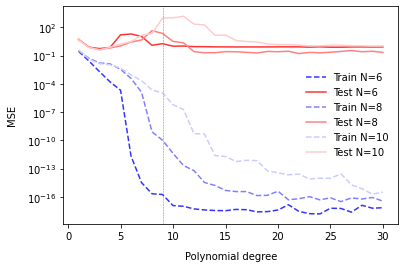

In [7]:
# Plot multiple MSE vs. degree curves
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_yscale('log')
ax.set_xlabel('Polynomial degree', labelpad = 10)
ax.set_ylabel('MSE', labelpad = 10)
# Set the minimum and maximum number of training samples
num_train_samples_min = num_train_samples - 4
num_train_samples_max = num_train_samples
# Repeat the experiments with different number of training samples
for tmp_num_train_samples in range(num_train_samples_min, num_train_samples_max + 1, 2):
    mse_train, mse_test = compute_performance(num_train_samples=tmp_num_train_samples, 
                                          num_runs=num_runs, num_basis_max=num_basis_max,
                                          train_noise_std=0)
    # Set the color intensity for each number of training samples
    e = float(tmp_num_train_samples - num_train_samples_min) / float(num_train_samples_max - num_train_samples_min)
    e = 0.2 + 0.6 * e
    ax.plot(np.arange(1, num_basis_max + 1), mse_train, color = (e, e, 1.0), 
            label = f'Train N={tmp_num_train_samples}', linestyle = '--')
    ax.plot(np.arange(1, num_basis_max + 1), mse_test, color = (1.0, e, e), 
            label = f'Test N={tmp_num_train_samples}')
ax.legend(frameon = False)
ax.axvline(x = 9,
           color = 'gray', linewidth = 0.5, linestyle = '--')
plt.show()